In [ ]:
# uploading covid datasets on cloud
!wget http://cb.lk/covid_19  
!unzip covid_19.zip

--2020-12-18 17:05:27--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-12-18 17:05:28--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-12-18 17:05:28--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-12-18 17:05:29--  https://www.dropbox.com/s/raw/7

In [ ]:
# from google.colab import drive
# # drive.mount('/content/Mydrive/DataSets')
# drive.mount('/content/Mydrive/' )
# !unzip '/content/Mydrive/MyDrive/DataSets/ct-sub-datasets.zip'

Drive already mounted at /content/Mydrive/; to attempt to forcibly remount, call drive.mount("/content/Mydrive/", force_remount=True).
Archive:  /content/Mydrive/MyDrive/DataSets/ct-sub-datasets.zip
replace ct-sub-datasets/test/Covid/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ct-sub-datasets/test/Covid/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%0.png  
  inflating: ct-sub-datasets/test/Covid/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%1.png  
  inflating: ct-sub-datasets/test/Covid/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-91.png  
  inflating: ct-sub-datasets/test/Covid/2020.03.12.20034686-p17-91-1.png  
  inflating: ct-sub-datasets/test/Covid/2020.03.12.20034686-p17-91-2.png  
  inflating: ct-sub-datasets/test/Covid/2020.03.22.20040782-p25-1542.png  
  inflating: ct-sub-

Importing important Libraries

In [ ]:
import keras
from keras.models import *
from keras.preprocessing import *  #For Data prerpocessing before making my own Model
from keras.layers import *
import PIL
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf



Data Augmentation

In [ ]:
#using Data augmentation in training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
    )
#using Rescale only in Testing
test_datagen=ImageDataGenerator(
    rescale = 1./255
)

Calling the image from image Directory
The flow_from_directory() method allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data.

The method expects that images belonging to different classes are present in different folders but are inside the same parent folder

In [ ]:
training_set = train_datagen.flow_from_directory(
        r'/content/CovidDataset/Train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        r'/content/CovidDataset/Val',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

FileNotFoundError: ignored

Building Our Model 
**VGG 16 STANDARD**

**Notes on code**.

**padding**: Int, or tuple of 2 ints, or tuple of 2 tuples of 2 ints.
*   If int: the same symmetric padding is applied to height and width.
*   If tuple of 2 ints: interpreted as two different symmetric padding values for height and width: (symmetric_height_pad, symmetric_width_pad)
*   If tuple of 2 tuples of 2 ints: interpreted as ((top_pad,   bottom_pad), (left_pad, right_pad)).

**Input shape**.

4D tensor with shape: - If data_format is "channels_last": (batch_size, rows, cols, channels) - If data_format is "channels_first": (batch_size, channels, rows, cols)







In [ ]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Dropout((0.25)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2,activation="softmax"))



In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])

In [ ]:
results=model.fit( 
    training_set,  
    steps_per_epoch=2,
    epochs=70,
    validation_data=test_set,
    validation_steps=2
)

Epoch 1/70
2/2 [==============================] - 4s 2s/step - loss: 20.2942 - accuracy: 0.4531 - val_loss: 0.7056 - val_accuracy: 0.5000
Epoch 2/70
2/2 [==============================] - 3s 1s/step - loss: 0.7084 - accuracy: 0.5312 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 3/70
2/2 [==============================] - 3s 2s/step - loss: 0.6989 - accuracy: 0.5312 - val_loss: 0.6928 - val_accuracy: 0.7833
Epoch 4/70
2/2 [==============================] - 3s 1s/step - loss: 0.6986 - accuracy: 0.5156 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/70
2/2 [==============================] - 3s 2s/step - loss: 0.6916 - accuracy: 0.5469 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 6/70
2/2 [==============================] - 3s 2s/step - loss: 0.6878 - accuracy: 0.5938 - val_loss: 0.6959 - val_accuracy: 0.5000
Epoch 7/70
2/2 [==============================] - 3s 2s/step - loss: 0.7001 - accuracy: 0.5312 - val_loss: 0.6990 - val_accuracy: 0.5000
Epoch 8/70
2/2 [========================

Text(0.5, 0, 'epoch')

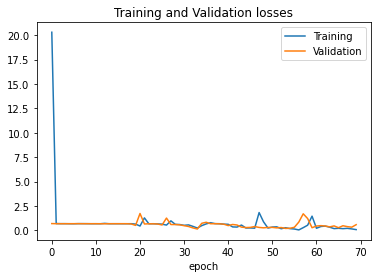

In [ ]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')